In [1]:
import numpy as np
import matplotlib.pyplot as plt

from curve.curves import lissajous
from curve.plot import curveplot

### Create a curve object

We use non-closed "lissajous" curve to demonstrate self intersecting.

In [2]:
crv = lissajous(t_start=-0.045, t_stop=np.pi*2-0.045, p_count=1000, a=8.0, b=7.0)[1:]

print(crv)

Curve([[-0.3048 -0.2677]
       [-0.2565 -0.225 ]
       [-0.2075 -0.1819]
       [-0.1581 -0.1384]
       ...
       [-0.489  -0.4323]
       [-0.4445 -0.3922]
       [-0.3989 -0.3514]
       [-0.3523 -0.3098]], size=999, ndim=2, dtype=float64)


### Find self-intersections

We just call `intersect` method of `Curve` object.

In [3]:
%%time
intersections = crv.intersect()

print(f'The number of intersections: {len(intersections)}')

The number of intersections: 97
Wall time: 398 ms


### Plot curve, normals and intersection points

We use `curveplot` to plot the curve, its normal vectors and intersection points.
Also we set `param='speed'` to colorize curve line by its speed values at each point.

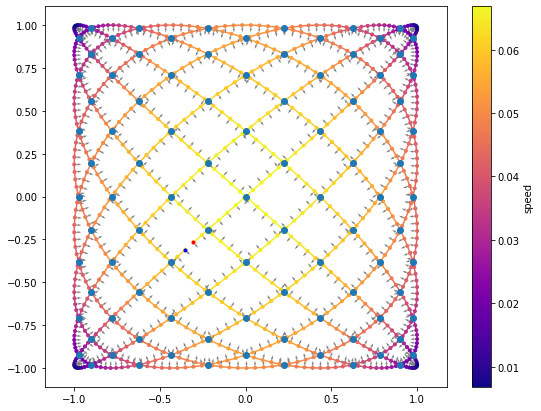

In [4]:
f, ax = plt.subplots(1, 1, figsize=(9, 7))

curveplot(crv, param='speed', marker='.', show_normals=True, axes=ax)

start, end = crv[0], crv[-1]

ax.scatter([start[0]], [start[1]], color='r', marker='.')
ax.scatter([end[0]], [end[1]], color='b', marker='.')

intsct_px = [] 
intsct_py = []

for n, intersection in enumerate(intersections, start=1):
    p = intersection.intersect_point
    intsct_px.append(p[0])    
    intsct_py.append(p[1])

ax.scatter(intsct_px, intsct_py)

plt.show()